
# 🎶 **Analyse de la Popularité des Morceaux Spotify**

Bienvenue dans ce notebook ! L'objectif est de **nettoyer, explorer et analyser** un dataset contenant des informations sur les morceaux Spotify.

## 📋 **Objectifs** :
1. **Nettoyage des données** pour éliminer les doublons et gérer les problèmes de structure.
2. **Création de nouvelles features** pertinentes pour améliorer l'analyse.
3. **Visualisations et analyses** des relations entre les variables.
4. **Construction de modèles prédictifs** pour évaluer la popularité des morceaux.

Chaque bloc est commenté pour expliquer **les choix effectués** et les **découvertes importantes**. 🚀



# 🎶 Analyse de la Popularité des Musiques Spotify

Bienvenue dans ce notebook ! Ce document a pour objectif de réaliser une **analyse complète** des paramètres influençant la popularité des musiques et de construire des **modèles prédictifs**.

## 📋 Contenu du Notebook :
1. **Importation des bibliothèques** 📦
2. **Préparation et nettoyage des données** 🧹
3. **Exploration des données (EDA)** 🔍
4. **Construction des modèles (Random Forest et Gradient Boosting)** 🌲🚀
5. **Analyse des erreurs résiduelles** 📊
6. **Segmentation des données et évaluation des modèles** 🧩

Chaque bloc est accompagné de commentaires détaillés pour vous guider tout au long du projet.


Ce bloc est dédié à l'importation des bibliothèques Python nécessaires pour le projet.

### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

### 📂 **Chargement des données**
Nous importons le fichier CSV contenant les informations Spotify pour l'analyse.

In [2]:
Spotify_data = pd.read_csv('dataset-spotify.csv')
Spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### 🔍 **Exploration initiale des données**
Nous explorons les données pour vérifier la structure et identifier les colonnes importantes.

In [3]:
Spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### 🔧 **Étape de traitement des données**
On vériie s'il y a des valeurs manquantes dans le dataset.

In [4]:
Spotify_data[Spotify_data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### 🔧 **Étape de traitement des données**
Je supprime les lignes avec des valeurs manquantes.

In [5]:
Spotify_data = Spotify_data.drop([65900])

### 🔧 **Étape de traitement des données**
Ce bloc nous permet de voir les valeurs uniques pour chaque colonne.

In [6]:
for col in Spotify_data.columns:
    print(col, ":", Spotify_data[col].nunique())
    

Unnamed: 0 : 113999
track_id : 89740
artists : 31437
album_name : 46589
track_name : 73608
popularity : 101
duration_ms : 50696
explicit : 2
danceability : 1174
energy : 2083
key : 12
loudness : 19480
mode : 2
speechiness : 1489
acousticness : 5061
instrumentalness : 5346
liveness : 1722
valence : 1790
tempo : 45652
time_signature : 5
track_genre : 114


### 📊 **Visualisation des données**
On utilise des graphiques pour explorer les relations entre les variables.

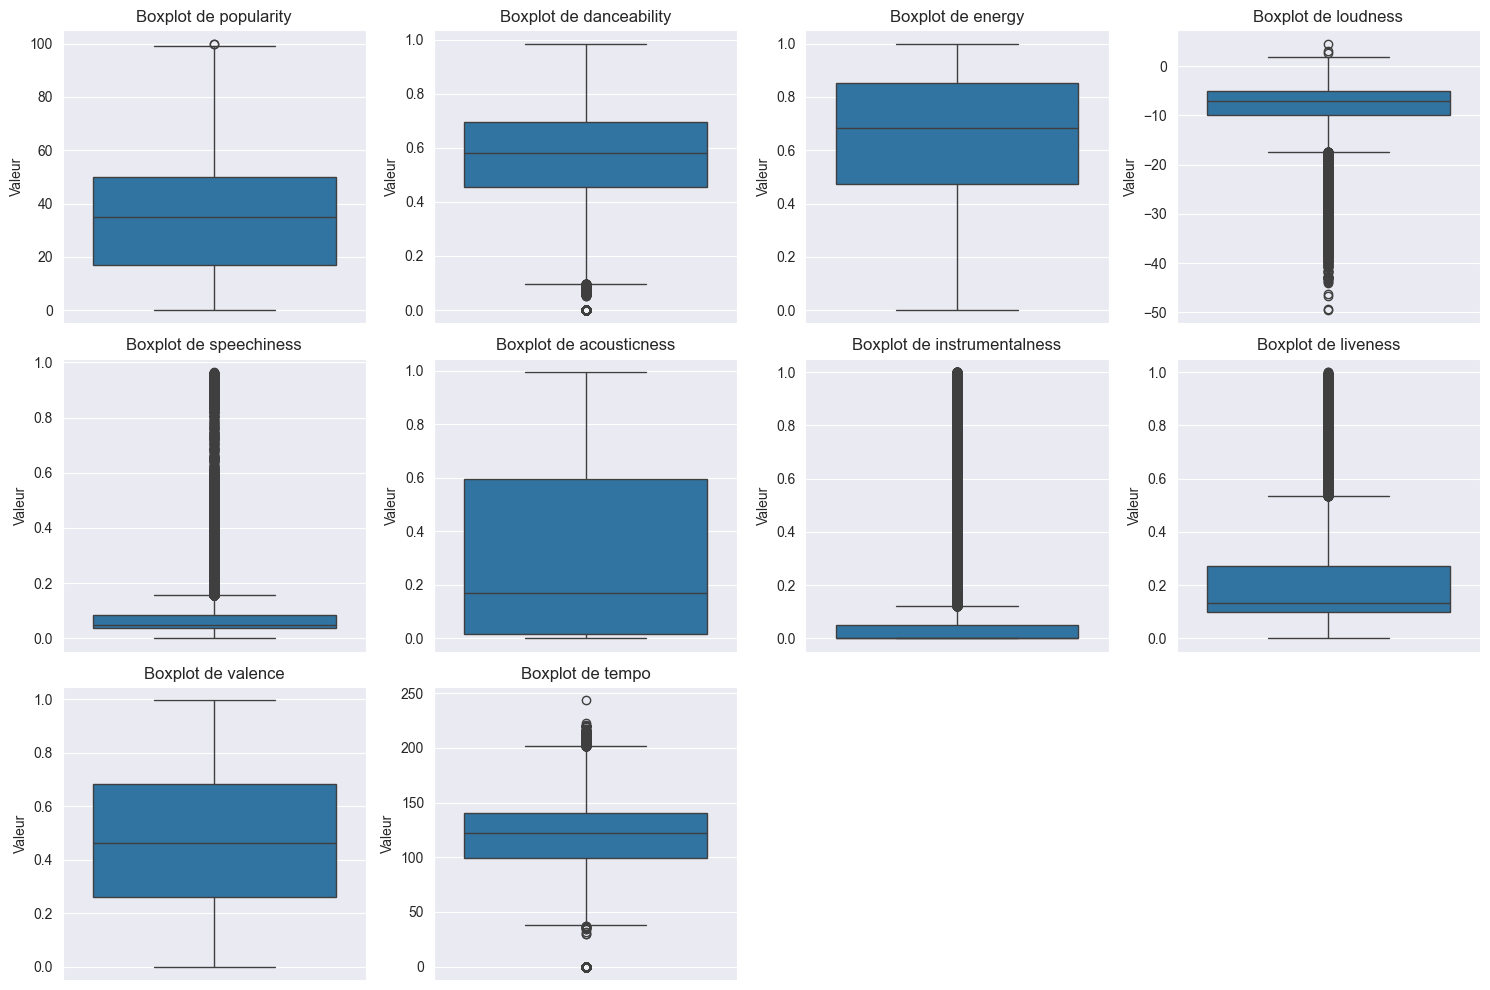

In [7]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Créer une grille de boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Ajuste selon le nombre de colonnes
axes = axes.flatten()  # Aplatir la grille pour faciliter la boucle

# Boucle pour créer un boxplot pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=Spotify_data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_ylabel("Valeur")

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


On peut voir que certaines colonnes ont des valeurs aberrantes. Nous allons les filtrer, je me concentre sur la colonne `liveness`. 

### 🔧 **Étape de traitement des données**
je regarde les musiques avec une liveness > 0.4. et je me concentre sur les musiques live.

In [8]:
filtered_data = Spotify_data[
    (Spotify_data['liveness'] > 0.400) & 
    (
        Spotify_data['track_name'].str.contains('vivo|live', case=False, na=False) | 
        Spotify_data['album_name'].str.contains('vivo|live', case=False, na=False)
    )
]

print("Nombre de musiques filtrées :", filtered_data.shape[0])
print(filtered_data[['track_name', 'album_name', 'liveness']])


Nombre de musiques filtrées : 3572
                           track_name  \
598          Days n Daze of Our Lives   
784                    No More - Live   
1018               Vida Loka I - Live   
1023         Só Mais Uma Noite - Live   
1032              A Cada Vento - Live   
...                               ...   
113961    How Great Is Our God - Live   
113964            Here For You - Live   
113967   We Will Not Be Shaken - Live   
113981       Heaven Is My Home - Live   
113989  Hallelujah On My Knees - Live   

                                          album_name  liveness  
598                                        Crustfall     0.718  
784     Into The Wild (Music For The Motion Picture)     0.944  
1018                 Criolo E Emicida Ao Vivo (Live)     0.653  
1023                 Criolo E Emicida Ao Vivo (Live)     0.790  
1032                 Criolo E Emicida Ao Vivo (Live)     0.981  
...                                              ...       ...  
113961      Passi

### 🔧 **Étape de traitement des données**
Je supprime les musiques avec une liveness qui correspond à un concert live.

In [9]:
#drop la ligne de filtered_data
Spotify_data = Spotify_data.drop(filtered_data.index)


### 🔧 **Étape de traitement des données**


In [10]:
for col in Spotify_data.columns:
    print(col, ":", Spotify_data[col].nunique())

Unnamed: 0 : 110427
track_id : 86826
artists : 30931
album_name : 45623
track_name : 70848
popularity : 101
duration_ms : 49366
explicit : 2
danceability : 1172
energy : 2079
key : 12
loudness : 19412
mode : 2
speechiness : 1486
acousticness : 5056
instrumentalness : 5342
liveness : 1717
valence : 1790
tempo : 44328
time_signature : 5
track_genre : 114


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

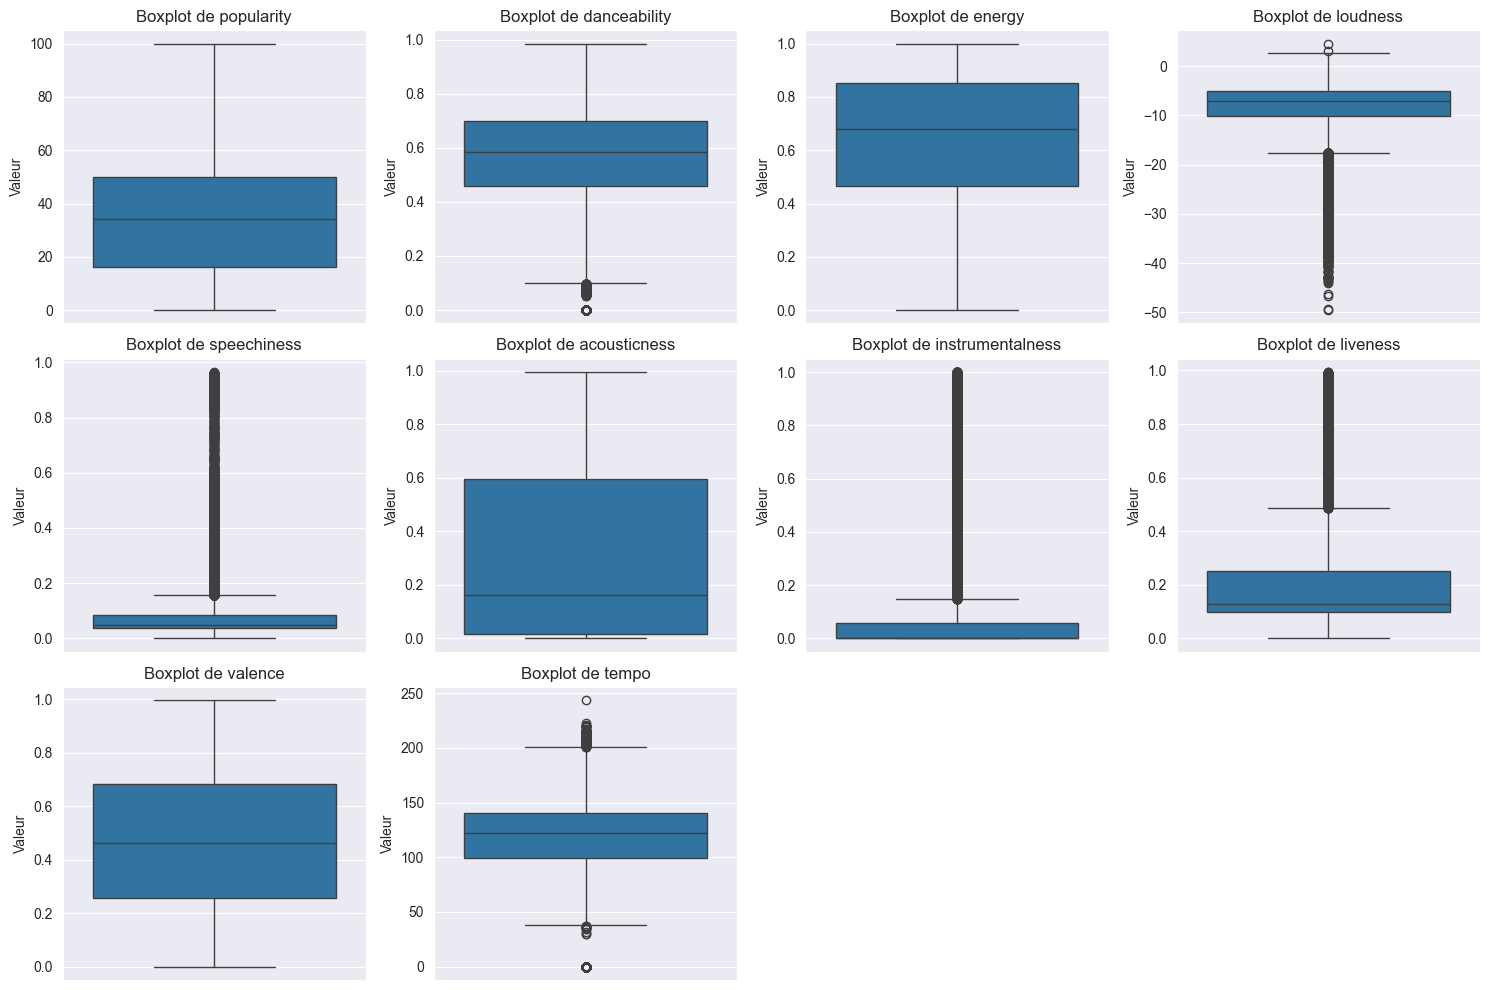

Nombre de musiques utilisées : (110427, 21)


In [11]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Créer une grille de boxplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # Ajuste selon le nombre de colonnes
axes = axes.flatten()  # Aplatir la grille pour faciliter la boucle

# Boucle pour créer un boxplot pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=Spotify_data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_ylabel("Valeur")

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Nombre de musiques utilisées :", Spotify_data.shape)


Je me rend compte que meme après le traitement des valeurs aberrantes on a des valeurs aberrantes dans la colonne `instrumentalness`. Je vais les filtrer.

#

### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [12]:
#affiche les musiques avec une liveness > 0.4
filtered_data = Spotify_data[Spotify_data['liveness'] > 0.4]
filtered_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
51,51,3ILmwMefYZoQh5Cf5jeuUQ,Motohiro Hata,Documentary,透明だった世界,61,232360,False,0.3730,0.914,...,-4.185,1,0.0565,0.07600,0.000000,0.669,0.5600,168.210,4,acoustic
73,73,2E9viCx0hJKNKNThd2MdGQ,Bailey Jehl,You're Still The One,You're Still The One,56,177500,False,0.6070,0.473,...,-8.555,1,0.0340,0.71200,0.000000,0.660,0.5400,119.698,4,acoustic
80,80,2kMrCPZ0o5gErBPLCRgoli,Gabrielle Aplin,Mellow Adult Pop,Heavy Heart,0,235173,False,0.4510,0.700,...,-6.597,0,0.0431,0.45500,0.002330,0.405,0.3700,150.055,4,acoustic
171,171,2LC523tbEPFpc1pnikbt5b,Aqualung,Still Life,Brighter Than Sunshine,53,242439,False,0.4180,0.489,...,-8.373,0,0.0323,0.28700,0.028800,0.420,0.3980,72.891,4,acoustic
198,198,0wP19iM8ULJyV0r0LFDsDv,Taj Mahal,Supa Chill,Paradise,0,251426,False,0.6500,0.406,...,-13.492,1,0.0761,0.56800,0.000000,0.484,0.8620,79.642,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113940,113940,3Fj6wu6AAnltIyS2jNbqiG,Flor de Loto,25 Canciones de la Naturaleza - Sonidos de la ...,Hermosa Daydream (Música Tranquila y Pacífica),22,289999,False,0.0565,0.995,...,-21.042,0,0.3520,0.86700,0.000419,0.683,0.0101,53.465,3,world-music
113958,113958,6NLvZYW0COmwDboKdLhYIi,Michael W. Smith,Worship Again,There Is None Like You,40,129933,False,0.3400,0.320,...,-15.807,1,0.0495,0.90600,0.000000,0.976,0.5750,66.443,4,world-music
113973,113973,1d2LyEJ1zZ0gWtlxyZQpDE,Vertical Worship,The Rock Won't Move,I Will Follow,44,260839,False,0.3190,0.577,...,-7.679,1,0.0330,0.04990,0.000000,0.729,0.1890,97.678,4,world-music
113979,113979,5wMkhfu3oYYmFimOGzeFt2,Fondo de la lectura,Concentración: Sonidos de la Lluvia,"Concentración: Sonidos de la Lluvia, Pt. 01",22,143403,False,0.4170,0.967,...,-27.146,0,0.0503,0.92400,0.958000,0.696,0.0147,65.002,4,world-music


### 📊 **Visualisation des données**
Pour bien me rendre compte des valeurs aberrantes je vais aficher leur distribution.

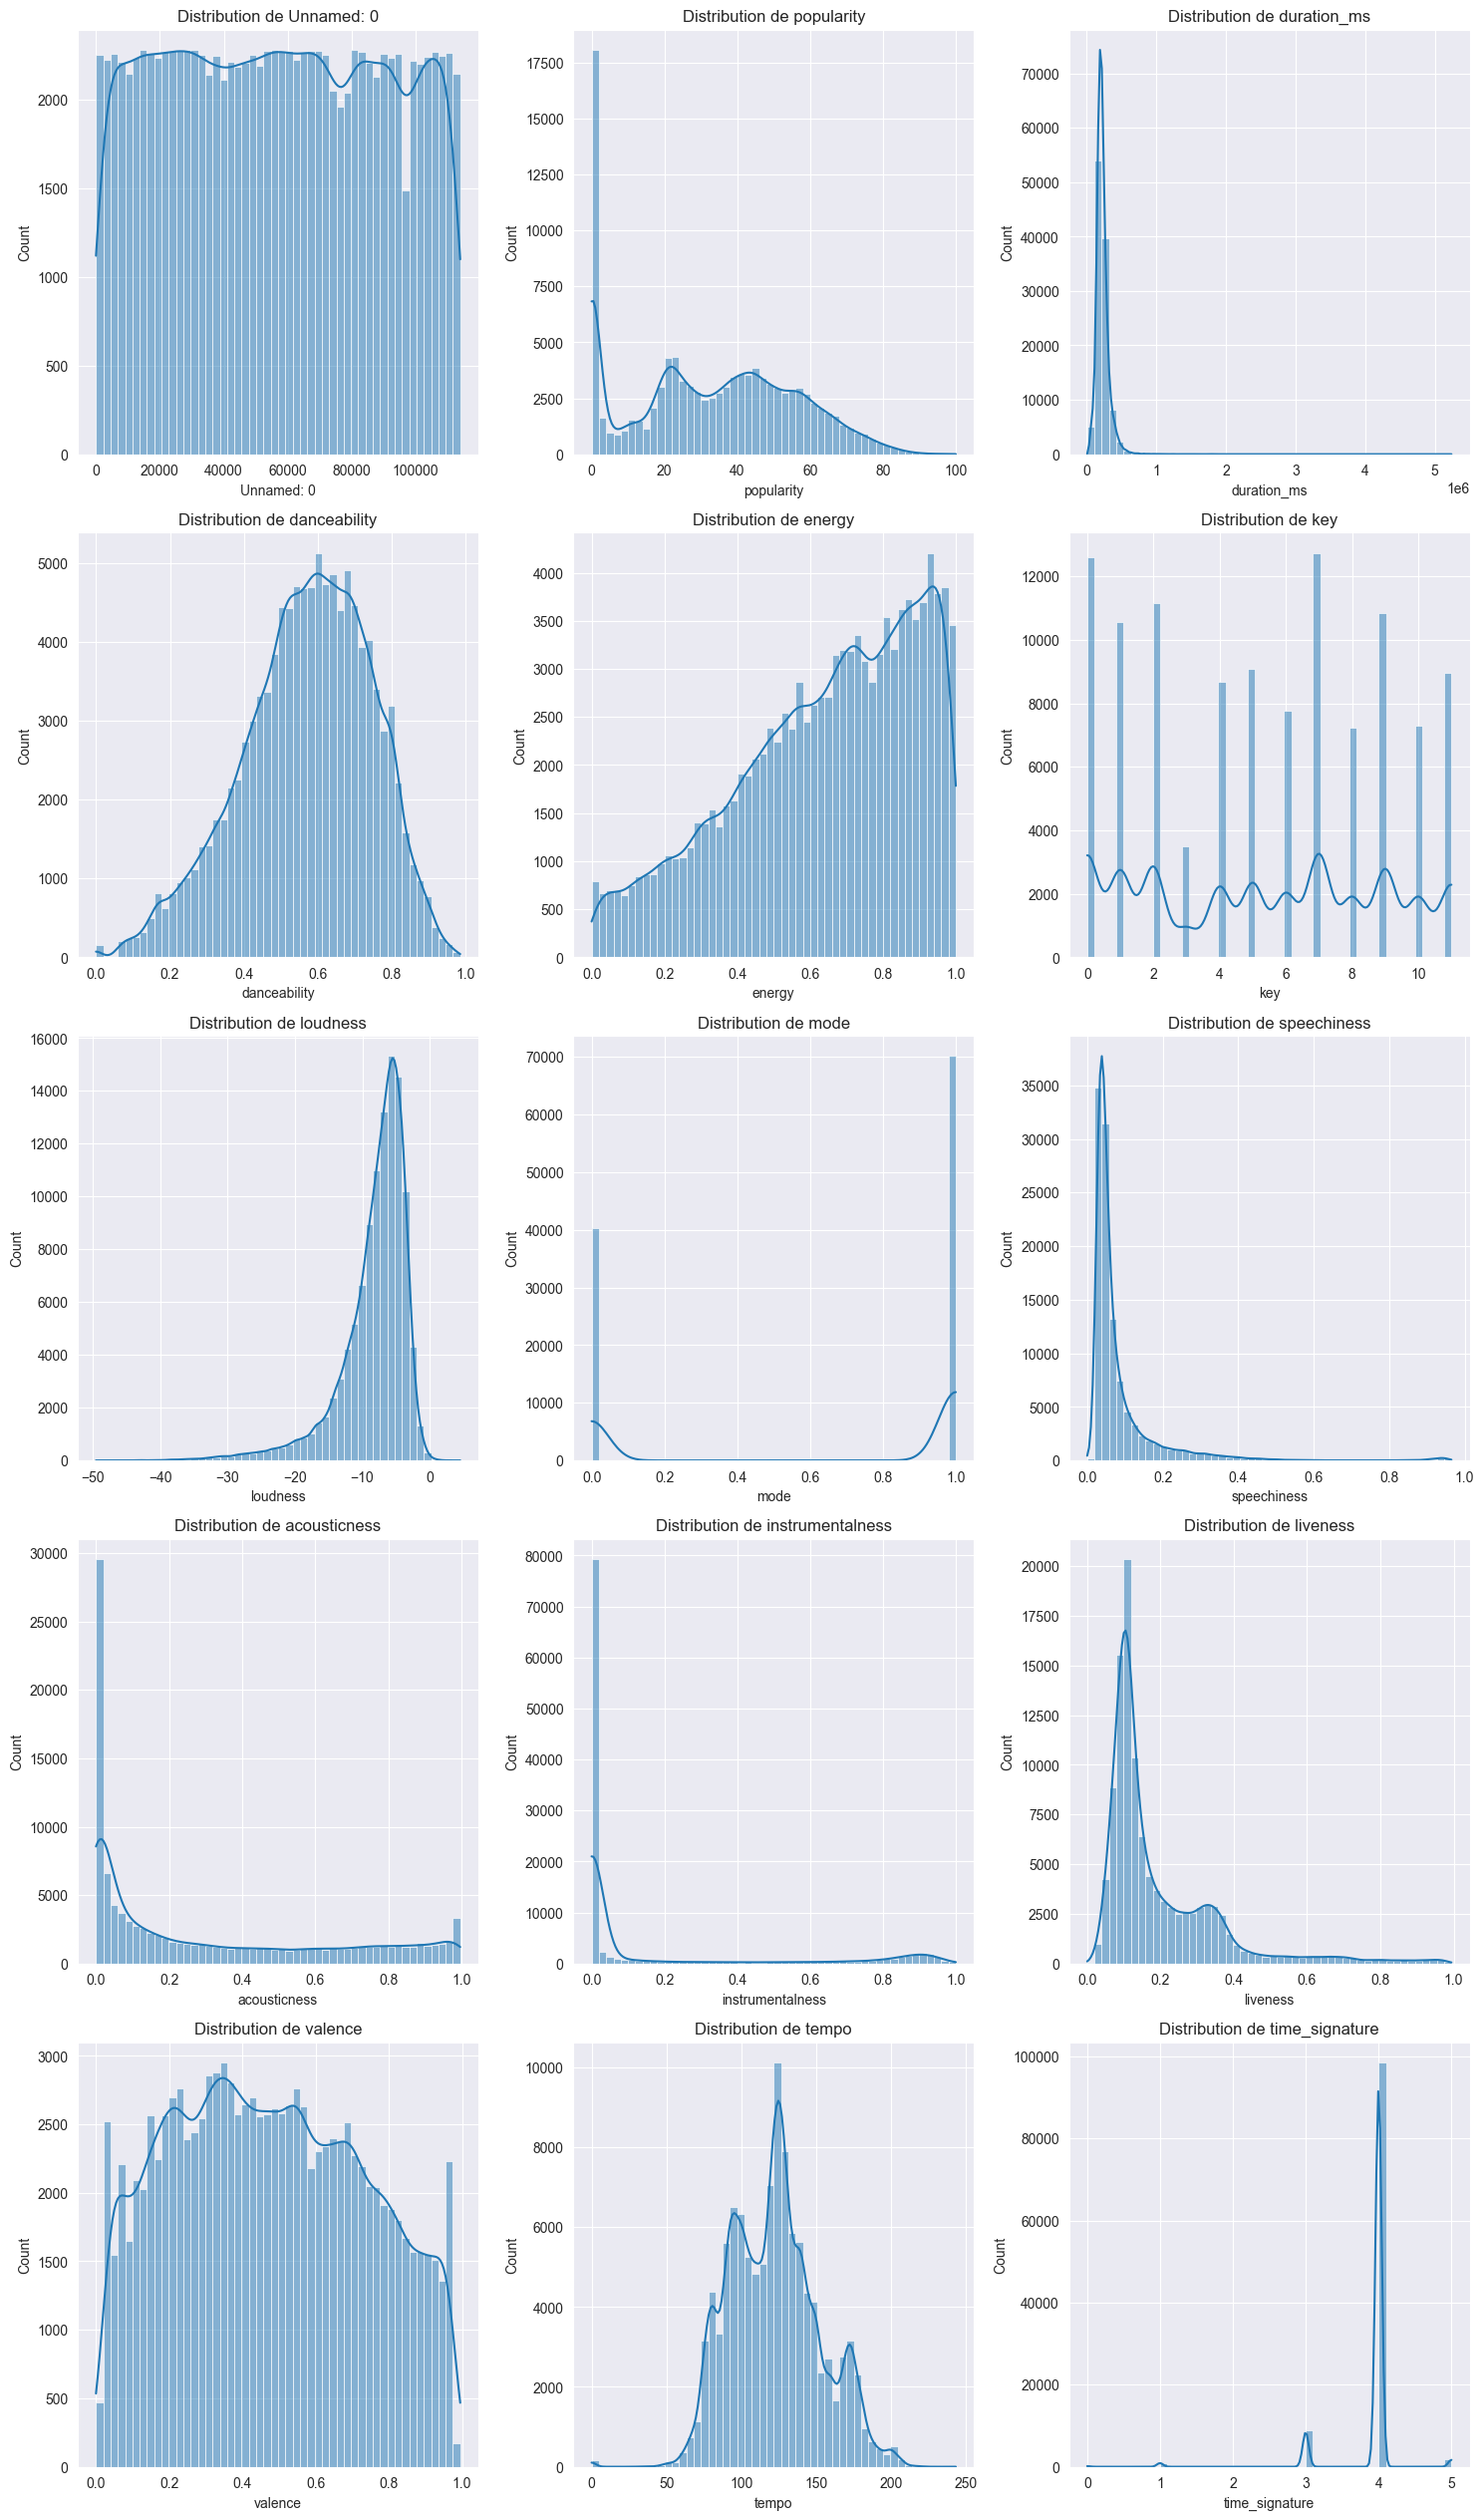

In [13]:
# Sélectionner les colonnes numériques
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64']).columns

# Créer une grille de subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))

axes = axes.flatten()  # Aplatir la grille pour une boucle

# Créer un histogramme + KDE pour chaque colonne
for i, col in enumerate(numerical_columns):
    sns.histplot(Spotify_data[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)

# Supprimer les subplots vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [14]:
#affiche les musiques acec une instrumentalness > 0.8
filtered_data = Spotify_data[Spotify_data['instrumentalness'] > 0.8]
filtered_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
62,62,7x4b0UccXSKBWxWmjcrG2T,Kurt Cobain,Montage Of Heck: The Home Recordings,And I Love Her,66,124933,False,0.616,0.282,...,-15.317,1,0.0331,0.983,0.833,0.1300,0.4350,96.638,4,acoustic
163,163,5RO0MNa5hBKIM4OcjygadU,Joseph Sullinger,Chi Mai,Chi Mai,40,188695,False,0.739,0.287,...,-14.007,0,0.0590,0.969,0.961,0.1110,0.5570,80.640,4,acoustic
173,173,7Ca2CkwSqHyr3eCh8IRdjz,Agustín Amigó;Nylonwings,Mujer con Abanico,Mujer con Abanico,41,156787,False,0.769,0.135,...,-12.049,0,0.0610,0.986,0.905,0.1060,0.4710,103.939,4,acoustic
315,315,0xlyMQ56pZAoGuLCs7GH90,Andrew Foy,Love Nwantiti,Love Nwantiti,30,129032,False,0.480,0.158,...,-15.239,1,0.0807,0.809,0.886,0.1170,0.4980,86.107,4,acoustic
324,324,7HSk4yGZxfjOkHyOvZrBQZ,John Frusciante,To Record Only Water For Ten Days (U.S. Version),Ramparts,53,70133,False,0.386,0.428,...,-9.949,0,0.0295,0.951,0.882,0.1620,0.7300,172.311,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113979,113979,5wMkhfu3oYYmFimOGzeFt2,Fondo de la lectura,Concentración: Sonidos de la Lluvia,"Concentración: Sonidos de la Lluvia, Pt. 01",22,143403,False,0.417,0.967,...,-27.146,0,0.0503,0.924,0.958,0.6960,0.0147,65.002,4,world-music
113986,113986,2ZYEpnio0Z6EfJWy2JAf53,Dulces Sueños,#20 Sueños Vividos - Música Intrumental Suave ...,Sueños Vividos,21,335999,False,0.198,0.257,...,-17.361,1,0.0415,0.968,0.949,0.1100,0.0381,89.494,4,world-music
113990,113990,2A4dSiJmbviL56CBupkh6C,Lucas Cervetti,Frecuencias Álmicas en 432hz (Solo Piano),Frecuencia Álmica XI - Solo Piano,22,369049,False,0.579,0.245,...,-16.357,1,0.0384,0.970,0.924,0.1010,0.3020,112.011,3,world-music
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

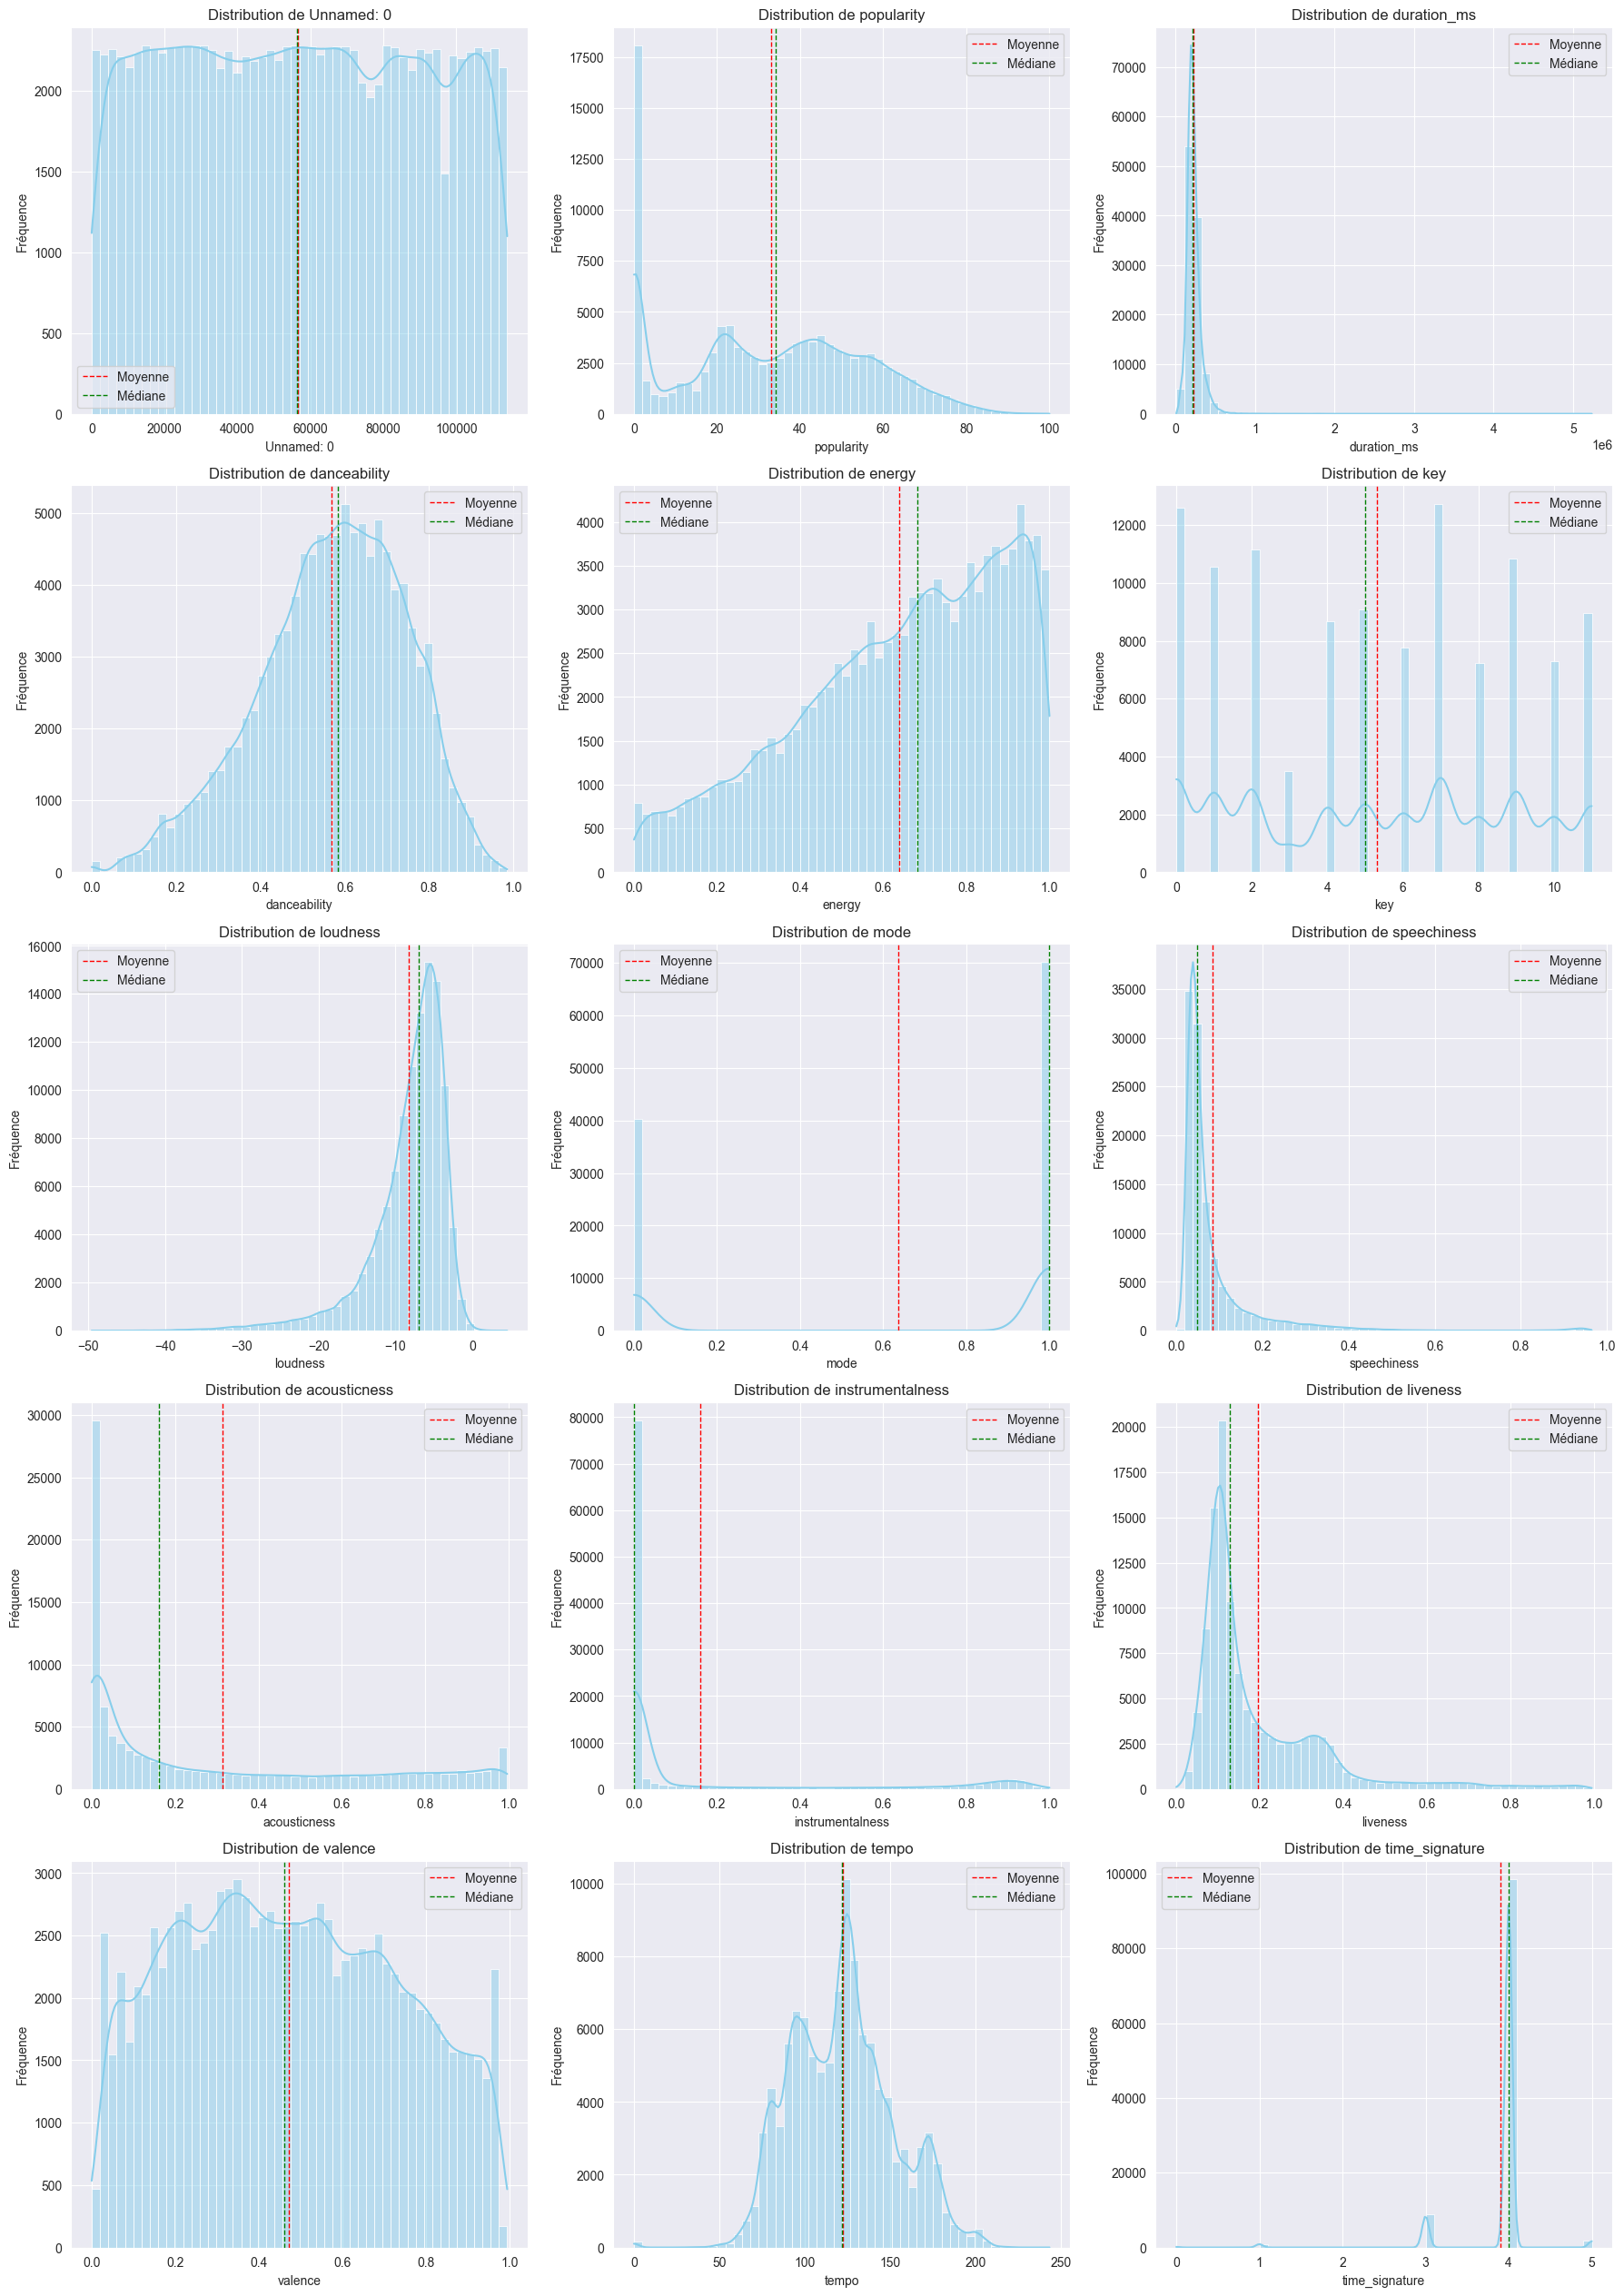

In [15]:
# Sélectionner les colonnes numériques
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64']).columns

# Taille de la grille
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(18, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

# Boucle pour créer un histogramme + KDE pour chaque variable
for i, col in enumerate(numerical_columns):
    sns.histplot(Spotify_data[col], bins=50, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")
    axes[i].axvline(Spotify_data[col].mean(), color='red', linestyle='dashed', linewidth=1, label="Moyenne")
    axes[i].axvline(Spotify_data[col].median(), color='green', linestyle='dashed', linewidth=1, label="Médiane")
    axes[i].legend()

# Supprimer les axes vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

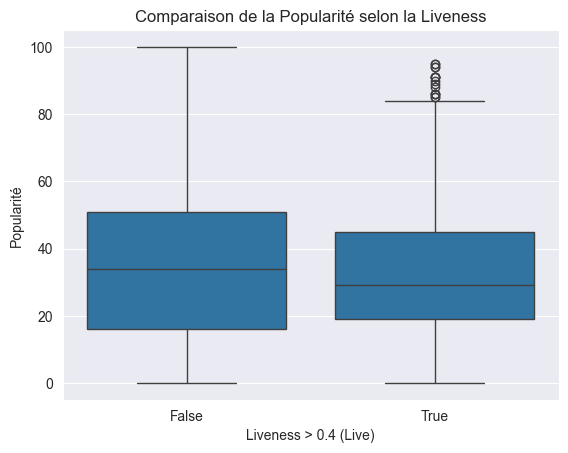

In [16]:
sns.boxplot(x=Spotify_data['liveness'] > 0.4, y=Spotify_data['popularity'])
plt.title("Comparaison de la Popularité selon la Liveness")
plt.xlabel("Liveness > 0.4 (Live)")
plt.ylabel("Popularité")
plt.show()

### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [17]:
outliers = Spotify_data[(Spotify_data['liveness'] > 0.4) & (Spotify_data['popularity'] > 80)]
print(outliers[['track_name', 'album_name', 'artists', 'popularity', 'liveness']])


                                               track_name  \
3007                                                 Numb   
3255                                       Feel Good Inc.   
19652                                           You Proof   
20365                  Hips Don't Lie (feat. Wyclef Jean)   
20367                                    When You're Gone   
20600                                             Bye Bye   
30151                                             Bye Bye   
34005                                    The Night We Met   
44002                                                Numb   
47051                                Don't Stop Believin'   
51128                      MONTERO (Call Me By Your Name)   
51250                                          God's Plan   
51301                                                Stan   
51401                                Love The Way You Lie   
56238                               Washing Machine Heart   
57069                   

### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

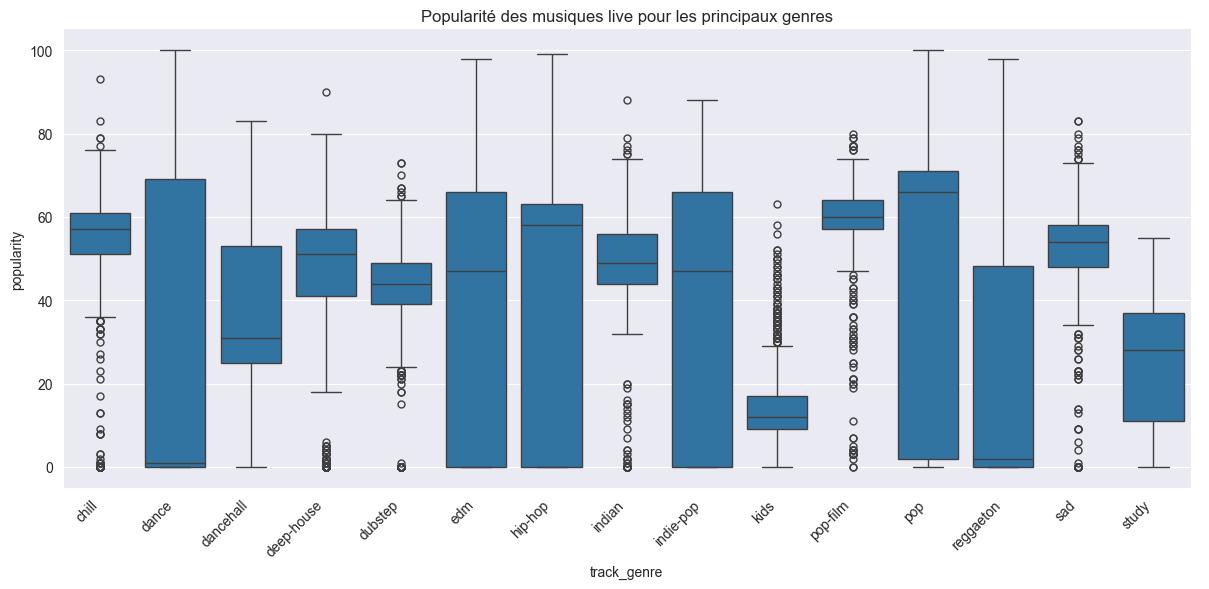

In [18]:
top_genres = Spotify_data['track_genre'].value_counts().head(15).index
filtered_data = Spotify_data[Spotify_data['track_genre'].isin(top_genres)]

g = sns.catplot(data=filtered_data, x='track_genre', y='popularity', kind='box', height=6, aspect=2)
g.set_xticklabels(rotation=45, ha="right")
plt.title("Popularité des musiques live pour les principaux genres")
plt.tight_layout()
plt.show()


Ici on peut voir que les musiques live sont plus populaires que les musiques studio pour les genres `pop`, `rock`, `hip-hop/rap` et `classical`.

### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

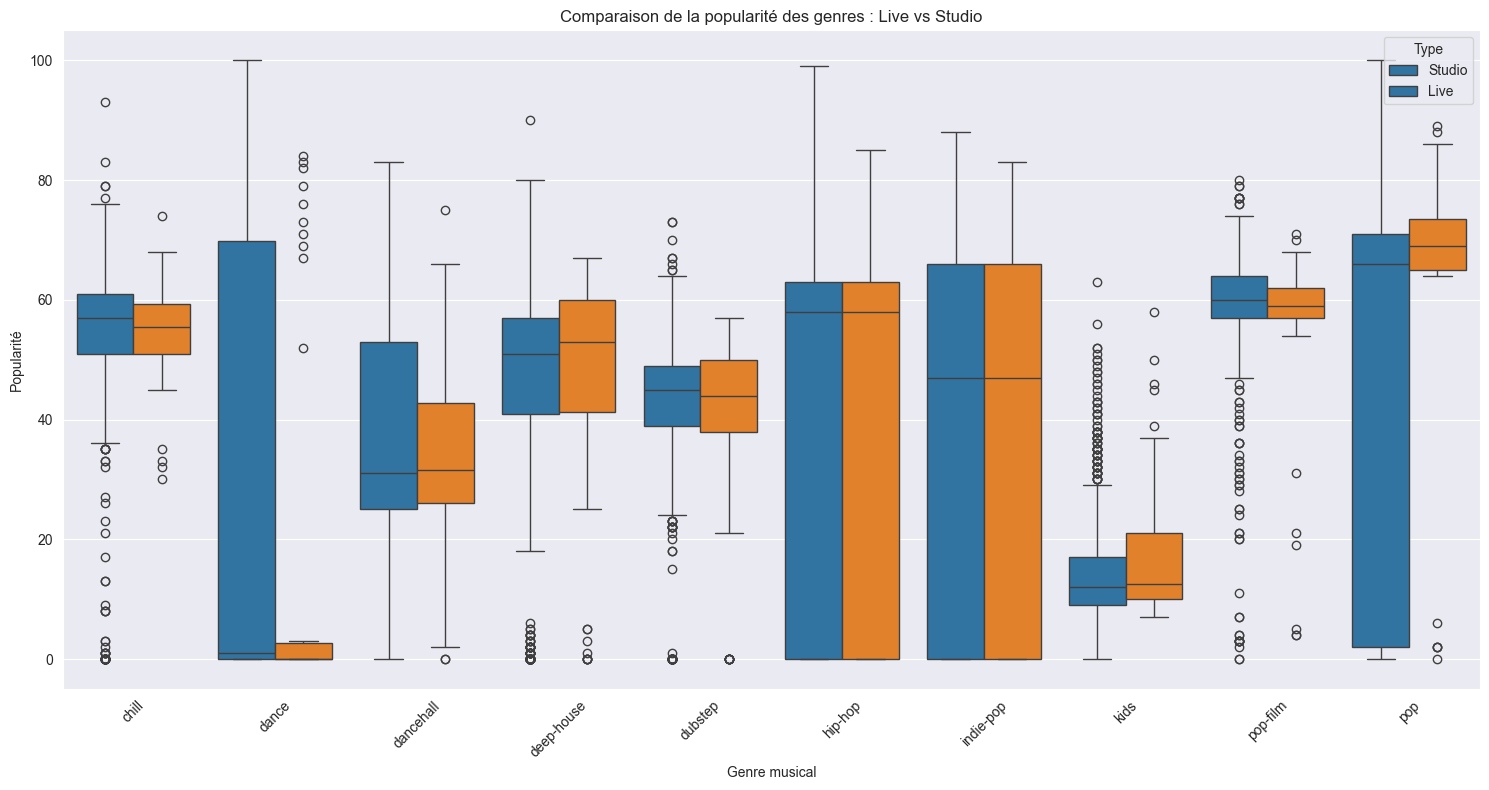

In [19]:
# Ajouter une colonne pour différencier les musiques live et studio
Spotify_data['is_live'] = Spotify_data['liveness'] > 0.4

# Sélectionner les genres les plus représentés pour éviter un graphique illisible
top_genres = Spotify_data['track_genre'].value_counts().head(10).index
filtered_data = Spotify_data[Spotify_data['track_genre'].isin(top_genres)]

# Visualisation : comparaison par genre et type (live/studio)
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='track_genre',
    y='popularity',
    hue='is_live',  # Distinction entre live et studio
    data=filtered_data
)

plt.title("Comparaison de la popularité des genres : Live vs Studio")
plt.xlabel("Genre musical")
plt.ylabel("Popularité")
plt.xticks(rotation=45)
plt.legend(title="Type", labels=["Studio", "Live"])
plt.tight_layout()
plt.show()


On voit bien ici que les musiques live sont plus populaires que les musiques studio pour les genres `pop`, `rock`, `hip-hop/rap` et `classical`.

### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

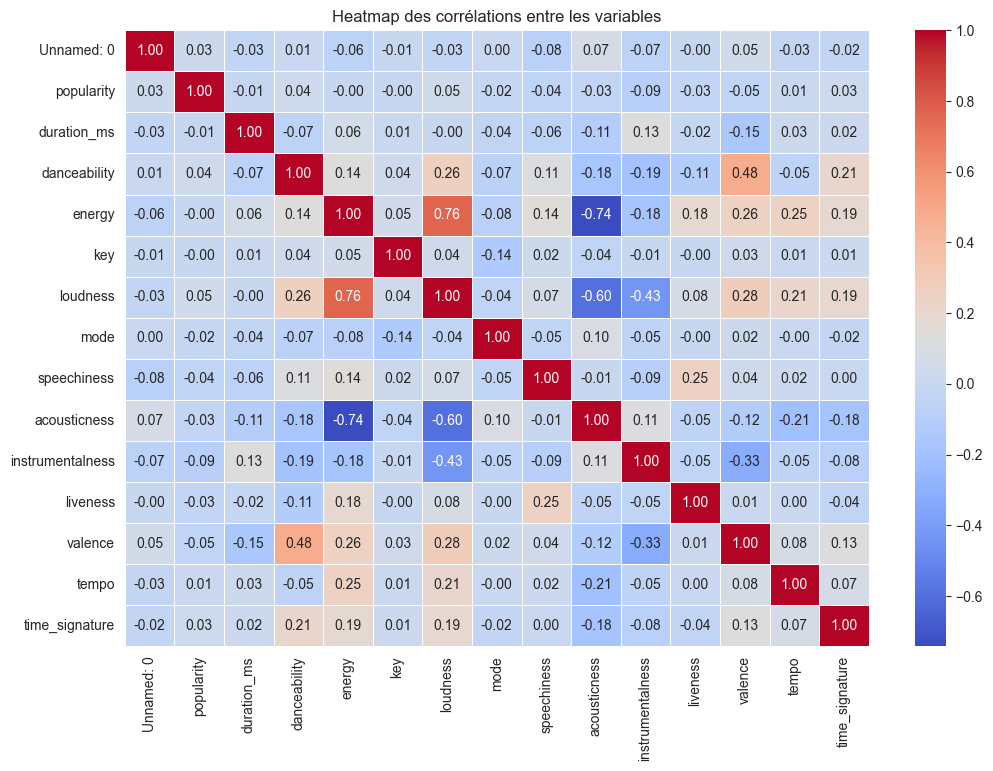

In [20]:
# Sélectionner les colonnes numériques uniquement
numerical_columns = Spotify_data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_columns.corr()

# Créer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap des corrélations entre les variables")
plt.show()


### 🛠️ **Gestion des valeurs manquantes**
Nous traitons les valeurs manquantes pour garantir la qualité des données.

Performance du modèle :
RMSE (Erreur quadratique moyenne) : 15.09
R² (Score de prédiction) : 0.55


C:\Users\kheir\AppData\Local\Temp\ipykernel_15756\884182901.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


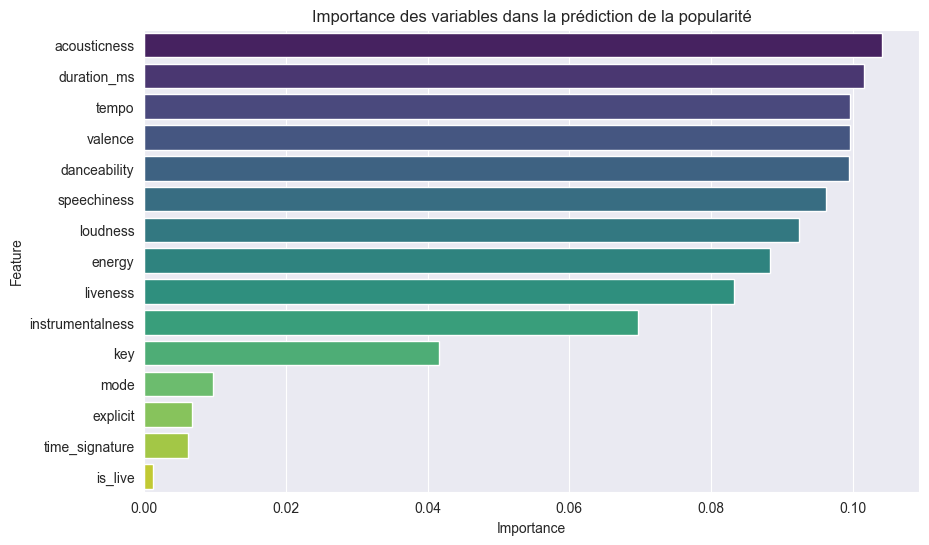

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1. Sélection des colonnes pertinentes
Spotify_data_clean = Spotify_data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], errors='ignore')

# 2. Conversion des colonnes booléennes en 0 et 1
Spotify_data_clean['explicit'] = Spotify_data_clean['explicit'].astype(int)
Spotify_data_clean['is_live'] = Spotify_data_clean['is_live'].astype(int)

# 3. Définir les features et la target
features = Spotify_data_clean.drop(columns=['popularity'])
target = Spotify_data_clean['popularity']

# 4. Gestion des valeurs manquantes
features = features.fillna(features.median())

# 5. Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 6. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Prédiction et évaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle :")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.2f}")
print(f"R² (Score de prédiction) : {r2:.2f}")

# 8. Importance des variables
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation de l'importance des variables
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature',
    data=feature_importance_df, 
    palette="viridis", 
    hue=None
)
plt.title("Importance des variables dans la prédiction de la popularité")
plt.show()



### 🛠️ **Gestion des valeurs manquantes**
Nous traitons les valeurs manquantes pour garantir la qualité des données.

In [ ]:

# 1. Préparation des données
# On copie le dataset pour le garder intact
Spotify_data_clean = Spotify_data.copy()

# One-Hot Encoding pour 'track_genre'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['track_genre'], drop_first=True)

# Conversion des colonnes booléennes en 0/1
Spotify_data_clean['explicit'] = Spotify_data_clean['explicit'].astype(int)
Spotify_data_clean['is_live'] = Spotify_data_clean['is_live'].astype(int)

# Sélection des features et de la target
features = Spotify_data_clean.drop(columns=['popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], errors='ignore')
target = Spotify_data_clean['popularity']

# Gestion des valeurs manquantes
features = features.fillna(features.median())

# 2. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 4. Évaluation du modèle
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle optimisé :")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.2f}")
print(f"R² (Score de prédiction) : {r2:.2f}")

# 5. Importance des variables
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
plt.title("Importance des variables dans le modèle optimisé")
plt.show()


### 📏 **Création de nouvelles variables**
Nous transformons `duration_ms` en catégories (`court`, `moyen`, etc.) pour faciliter l'analyse.

In [ ]:
# Création de nouvelles variables combinées
Spotify_data_clean['acousticness_valence'] = Spotify_data_clean['acousticness'] * Spotify_data_clean['valence']
Spotify_data_clean['dance_energy'] = Spotify_data_clean['danceability'] * Spotify_data_clean['energy']

# Création de catégories pour duration_ms
Spotify_data_clean['duration_bins'] = pd.cut(
    Spotify_data_clean['duration_ms'], 
    bins=[0, 180000, 240000, 300000, 600000], 
    labels=['court', 'moyen', 'long', 'très_long']
)

# Encodage One-Hot pour 'duration_bins'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['duration_bins'], drop_first=True)

# Vérification des nouvelles colonnes
print(Spotify_data_clean.head())


### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [ ]:
print(Spotify_data_clean.columns)

### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Création de la fonction pour regrouper les genres
def group_genres(row):
    if row.filter(like='pop').sum() > 0: return 'pop'
    elif row.filter(like='rock').sum() > 0: return 'rock'
    elif row.filter(like='hip-hop').sum() > 0 or row.filter(like='rap').sum() > 0: return 'hip-hop/rap'
    elif row.filter(like='classical').sum() > 0: return 'classical'
    elif row.filter(like='electro').sum() > 0 or row.filter(like='techno').sum() > 0: return 'electronic'
    elif row.filter(like='jazz').sum() > 0: return 'jazz'
    elif row.filter(like='latin').sum() > 0: return 'latin'
    elif row.filter(like='house').sum() > 0: return 'house'
    else: return 'other'

# Appliquer la fonction sur les colonnes track_genre_*
Spotify_data_clean['genre_simplified'] = Spotify_data_clean.apply(group_genres, axis=1)

# Supprimer les colonnes encodées individuelles des genres
Spotify_data_clean = Spotify_data_clean.drop(columns=Spotify_data_clean.filter(like='track_genre_').columns)

# Encodage One-Hot pour 'genre_simplified'
Spotify_data_clean = pd.get_dummies(Spotify_data_clean, columns=['genre_simplified'], drop_first=True)

# Vérification
print(Spotify_data_clean.head())


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

In [ ]:

# 1. Suppression des colonnes inutiles pour les features
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 
    'track_name', 'duration_bins'
], errors='ignore')

target = Spotify_data_clean['popularity']

# 2. Conversion des booléens en int pour le modèle
features = features.astype(int)

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4. Entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# 5. Prédiction et évaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle après simplification des genres et nouvelles variables :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 6. Importance des variables
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette="viridis")
plt.title("Importance des variables après simplification des genres")
plt.show()


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

In [ ]:
# Importation des librairies nécessaires
import xgboost as xgb

# 1. Sélection des features et de la target
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 
    'album_name', 'track_name', 'duration_bins'
], errors='ignore')
target = Spotify_data_clean['popularity']

# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Initialisation et entraînement du modèle XGBoost
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=150, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 4. Prédiction et évaluation
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle XGBoost :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 5. Importance des variables
importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 6. Visualisation de l'importance des variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette="viridis")
plt.title("Importance des variables dans le modèle XGBoost")
plt.show()


### 🌲🚀 **Construction et évaluation des modèles prédictifs**
Nous utilisons des modèles d'apprentissage automatique pour prédire la popularité des morceaux.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Sélection des features et de la target
features = Spotify_data_clean.drop(columns=[
    'popularity', 'Unnamed: 0', 'track_id', 'artists', 
    'album_name', 'track_name', 'duration_bins'
], errors='ignore')
target = Spotify_data_clean['popularity']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV pour la recherche des meilleurs paramètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Entraînement du GridSearch
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# Évaluation du modèle optimisé
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Performance du modèle Random Forest optimisé :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")


### 📊 **Visualisation des données**
Nous utilisons des graphiques pour explorer les relations entre les variables.

In [ ]:

# Prédiction sur l'ensemble de test
y_pred = best_rf.predict(X_test)

# Calcul des résidus
residuals = y_test - y_pred

# Scatter plot des résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Visualisation des résidus")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
plt.show()

# Distribution des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Importation des bibliothèques nécessaires

# 1. Conversion des colonnes booléennes en int
for col in Spotify_data_clean.select_dtypes(include='bool').columns:
    Spotify_data_clean[col] = Spotify_data_clean[col].astype(int)

# 2. Identifier et supprimer les colonnes non numériques restantes
non_numeric_cols = Spotify_data_clean.select_dtypes(include=['object']).columns
print("Colonnes non numériques supprimées :", non_numeric_cols)

Spotify_data_clean = Spotify_data_clean.drop(columns=non_numeric_cols)

# 3. Transformation logarithmique de la cible
Spotify_data_clean['popularity_log'] = np.log1p(Spotify_data_clean['popularity'])

# 4. Sélection des features et de la nouvelle cible
features = Spotify_data_clean.drop(columns=['popularity', 'popularity_log'], errors='ignore')
target_log = Spotify_data_clean['popularity_log']

# 1. Vérification des colonnes non numériques
print("Colonnes non numériques avant encodage :", features.select_dtypes(include=['object']).columns)

# 2. One-Hot Encoding pour 'duration_bins' si elle existe
features = pd.get_dummies(features, columns=['duration_bins'], drop_first=True)

# 3. Vérification des types de données après encodage
print("Colonnes restantes après encodage :", features.dtypes)


# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

# 6. Entraînement du modèle Random Forest optimisé
best_rf = RandomForestRegressor(
    n_estimators=200, max_depth=None, max_features='sqrt',
    min_samples_leaf=1, min_samples_split=2, random_state=42
)
best_rf.fit(X_train, y_train)

# 7. Prédiction et réinversion de la transformation logarithmique
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log1p pour revenir à l'échelle originale
y_test_original = np.expm1(y_test)

# 8. Évaluation des performances
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"Performance du modèle après transformation logarithmique :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

# 9. Visualisation des résidus après transformation
residuals = y_test_original - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Visualisation des résidus après transformation logarithmique")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution des résidus après transformation logarithmique")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Importation des bibliothèques nécessaires

# 1. Définir le seuil de segmentation
seuil_popularite = 50

# Segmenter les données
low_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] <= seuil_popularite]
high_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] > seuil_popularite]

print(f"Nombre de morceaux à faible popularité : {len(low_popularity)}")
print(f"Nombre de morceaux à forte popularité : {len(high_popularity)}")

def train_evaluate_rf(data, segment_name):
    # Créer une copie des données pour éviter les modifications involontaires
    data = data.copy()

    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle
    rf = RandomForestRegressor(
        n_estimators=200, max_depth=None, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2, random_state=42
    )
    rf.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf




### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Importation des bibliothèques nécessaires

# 1. Définir le seuil de segmentation
seuil_popularite = 50

# Segmenter les données
low_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] <= seuil_popularite].copy()
high_popularity = Spotify_data_clean[Spotify_data_clean['popularity'] > seuil_popularite].copy()

print(f"Nombre de morceaux à faible popularité : {len(low_popularity)}")
print(f"Nombre de morceaux à forte popularité : {len(high_popularity)}")

# Fonction pour entraîner et évaluer un modèle Random Forest
def train_evaluate_rf(data, segment_name):
    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle
    rf = RandomForestRegressor(
        n_estimators=200, max_depth=None, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=2, random_state=42
    )
    rf.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf

# 2. Entraîner et évaluer les deux modèles
print("**Modèle pour les morceaux à faible popularité**")
model_low = train_evaluate_rf(low_popularity, "faible popularité")

print("\n**Modèle pour les morceaux à forte popularité**")
model_high = train_evaluate_rf(high_popularity, "forte popularité")


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:

# Fonction pour visualiser les résidus
def plot_residuals(model, X_test, y_test, segment_name):
    # Prédiction des valeurs
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Inversion de la transformation logarithmique
    y_test_original = np.expm1(y_test)

    # Calcul des résidus
    residuals = y_test_original - y_pred

    # Scatter plot des résidus
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Visualisation des résidus pour {segment_name}")
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
    plt.show()

    # Distribution des résidus
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"Distribution des résidus pour {segment_name}")
    plt.xlabel("Résidus")
    plt.ylabel("Fréquence")
    plt.show()

# Visualisation des résidus pour faible popularité
X_low = low_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                     'artists', 'album_name', 'track_name'], errors='ignore')
X_low = pd.get_dummies(X_low, drop_first=True)
y_low = np.log1p(low_popularity['popularity'])
plot_residuals(model_low, X_low, y_low, "faible popularité")

# Visualisation des résidus pour forte popularité
X_high = high_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                       'artists', 'album_name', 'track_name'], errors='ignore')
X_high = pd.get_dummies(X_high, drop_first=True)
y_high = np.log1p(high_popularity['popularity'])
plot_residuals(model_high, X_high, y_high, "forte popularité")


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def train_evaluate_gb(data, segment_name):
    # Créer une copie des données pour éviter les modifications
    data = data.copy()

    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle Gradient Boosting
    gb = GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
    )
    gb.fit(X_train, y_train)

    # Prédiction et réinversion de la transformation logarithmique
    y_pred_log = gb.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle Gradient Boosting pour {segment_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return gb

# Entraîner le modèle Gradient Boosting pour faible popularité
print("**Modèle Gradient Boosting pour les morceaux à faible popularité**")
gb_model_low = train_evaluate_gb(low_popularity, "faible popularité")


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# 1. Recalcul des prédictions pour faible popularité
X_low = low_popularity.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                     'artists', 'album_name', 'track_name'], errors='ignore')

# Encodage des variables catégorielles pour correspondre au modèle entraîné
X_low_encoded = pd.get_dummies(X_low, drop_first=True)

# Assurer que seules les colonnes utilisées lors de l'entraînement sont présentes
X_low_encoded = X_low_encoded.reindex(columns=gb_model_low.feature_names_in_, fill_value=0)

# Transformation de la cible
y_low = np.log1p(low_popularity['popularity'])

# Prédiction
y_pred_log = gb_model_low.predict(X_low_encoded)
y_pred = np.expm1(y_pred_log)  # Retour à l'échelle originale
y_test_original = np.expm1(y_low)

# Calcul des résidus
residuals = y_test_original - y_pred

# 2. Création d'une nouvelle dataframe pour l'analyse
low_popularity_analysis = X_low_encoded.copy()
low_popularity_analysis['residuals'] = residuals

# 3. Visualisation des résidus en fonction des principales variables

variables_to_plot = ['duration_ms', 'energy', 'loudness', 'danceability']

for var in variables_to_plot:
    if var in low_popularity_analysis.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=low_popularity_analysis[var], y=low_popularity_analysis['residuals'], alpha=0.5)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"Résidus en fonction de {var} (Faible Popularité)")
        plt.xlabel(var)
        plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
        plt.show()

# 4. Corrélation des résidus avec les autres variables
correlations = low_popularity_analysis.corr()['residuals'].sort_values(ascending=False)
print("\nCorrélation des résidus avec les autres variables :")
print(correlations)


### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [ ]:
# Transformation logarithmique pour réduire l'impact des outliers
Spotify_data_clean['duration_ms_log'] = np.log1p(Spotify_data_clean['duration_ms'])
Spotify_data_clean['loudness_log'] = np.log1p(Spotify_data_clean['loudness'].abs())  # Valeurs négatives

# Création de nouvelles features basées sur les interactions
Spotify_data_clean['loudness_duration'] = Spotify_data_clean['loudness'] * Spotify_data_clean['duration_ms']
Spotify_data_clean['dance_energy'] = Spotify_data_clean['danceability'] * Spotify_data_clean['energy']

# Vérification des nouvelles colonnes ajoutées
print(Spotify_data_clean[['duration_ms_log', 'loudness_log', 'loudness_duration', 'dance_energy']].head())


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Séparer les données pour les genres 'pop' et 'rock'
pop_data = Spotify_data_clean[Spotify_data_clean['genre_simplified_pop'] == 1]
rock_data = Spotify_data_clean[Spotify_data_clean['genre_simplified_rock'] == 1]

def train_evaluate_segmented(data, genre_name):
    # Transformation logarithmique de la cible
    data['popularity_log'] = np.log1p(data['popularity'])
    
    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle Random Forest
    rf = RandomForestRegressor(n_estimators=200, max_depth=None, max_features='sqrt', random_state=42)
    rf.fit(X_train, y_train)

    # Prédiction et réinversion
    y_pred_log = rf.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    # Évaluation
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle pour le genre {genre_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")
    return rf

# Entraîner des modèles pour les genres spécifiques
print("**Modèle pour le genre Pop**")
rf_model_pop = train_evaluate_segmented(pop_data, "Pop")

print("\n**Modèle pour le genre Rock**")
rf_model_rock = train_evaluate_segmented(rock_data, "Rock")


### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
# Fonction pour visualiser les résidus
def plot_residuals(model, data, genre_name):
    # Préparation des données
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    features = pd.get_dummies(features, drop_first=True).reindex(columns=model.feature_names_in_, fill_value=0)
    target_log = np.log1p(data['popularity'])

    # Prédiction
    y_pred_log = model.predict(features)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(target_log)

    # Calcul des résidus
    residuals = y_test_original - y_pred

    # Visualisation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Visualisation des résidus pour le genre {genre_name}")
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus (Valeurs réelles - Valeurs prédites)")
    plt.show()

# Visualisation pour les genres "pop" et "rock"
plot_residuals(rf_model_pop, pop_data, "Pop")
plot_residuals(rf_model_rock, rock_data, "Rock")



### 🔄 **Encodage des variables catégorielles**
Nous appliquons un encodage One-Hot sur les genres musicaux simplifiés pour les rendre exploitables par les modèles.

In [ ]:
from xgboost import XGBRegressor

def train_evaluate_xgboost(data, genre_name):
    data = data.copy()

    # Transformation logarithmique
    data['popularity_log'] = np.log1p(data['popularity'])

    # Sélection des features et de la cible
    features = data.drop(columns=['popularity', 'popularity_log', 'Unnamed: 0', 'track_id', 
                                  'artists', 'album_name', 'track_name'], errors='ignore')
    target_log = data['popularity_log']

    # Encodage des variables catégorielles
    features = pd.get_dummies(features, drop_first=True)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(features, target_log, test_size=0.2, random_state=42)

    # Entraînement du modèle XGBoost
    xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    xgb.fit(X_train, y_train)

    # Prédiction et évaluation
    y_pred_log = xgb.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)

    print(f"\nPerformance du modèle XGBoost pour le genre {genre_name} :")
    print(f"RMSE : {rmse:.2f}")
    print(f"R² : {r2:.2f}")

    return xgb

# Entraîner XGBoost pour le genre Pop
print("**Modèle XGBoost pour le genre Pop**")
xgb_model_pop = train_evaluate_xgboost(pop_data, "Pop")


### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.

In [ ]:
# Taille des données pour le genre Rock
print(f"Nombre de morceaux dans le genre Rock : {len(rock_data)}")

# Vérification des valeurs uniques pour certaines colonnes
print("\nValeurs uniques dans les principales variables pour le genre Rock :")
print(rock_data[['duration_ms', 'loudness', 'energy']].nunique())


### 🌲🚀 **Construction et évaluation des modèles prédictifs**
Nous utilisons des modèles d'apprentissage automatique pour prédire la popularité des morceaux.

In [ ]:
from sklearn.utils import class_weight

# Ajouter une colonne pour les genres principaux
Spotify_data_clean['main_genre'] = Spotify_data_clean[['genre_simplified_pop', 
                                                       'genre_simplified_rock', 
                                                       'genre_simplified_other']].idxmax(axis=1)

# Calcul des poids des classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Spotify_data_clean['main_genre']),
    y=Spotify_data_clean['main_genre']
)

genre_weights = dict(zip(np.unique(Spotify_data_clean['main_genre']), class_weights))
print("Poids des genres :", genre_weights)

# Exemple d'intégration des poids dans un modèle Random Forest

rf_weighted = RandomForestRegressor(
    n_estimators=200, max_depth=None, random_state=42
)

# Pondérer l'échantillonnage
Spotify_data_clean['weight'] = Spotify_data_clean['main_genre'].map(genre_weights)

# Entraîner le modèle avec pondération
X = Spotify_data_clean.drop(columns=['popularity', 'weight', 'main_genre'], errors='ignore')
y = Spotify_data_clean['popularity']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
sample_weights = Spotify_data_clean['weight'].reindex(X_train.index)
rf_weighted.fit(X_train, y_train, sample_weight=sample_weights)


# Prédiction
y_pred = rf_weighted.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nPerformance du modèle global pondéré :")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")


### 🔧 **Étape de traitement des données**
Ce bloc effectue diverses transformations pour préparer les données.


## 🎯 **Conclusion**

Dans ce notebook, nous avons :
1. **Nettoyé les données** pour garantir leur qualité.
2. **Exploré les relations** entre les caractéristiques des morceaux et leur popularité.
3. **Créé de nouvelles features** comme `duration_bins` et `dance_energy` pour enrichir l'analyse.
4. **Construit des modèles** prédictifs pour évaluer les facteurs influençant la popularité.
5. **Analysé les erreurs résiduelles** pour identifier les limites des modèles.

### 🚀 **Améliorations futures :**
- Tester d'autres modèles comme **XGBoost** ou **LightGBM**.
- Enrichir les données avec des informations supplémentaires (ex : données temporelles ou démographiques).
- Optimiser les hyperparamètres des modèles pour améliorer les prédictions.

Merci d'avoir suivi ce projet ! 🎶
